In [90]:
import pandas as pd

df = pd.read_csv('papers.csv')

df.head()

,Conference,Year,Title,Author,Affiliation
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Yingxue Wang,"Swiss Federal Institute of Technology, Zurich"
1,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Rodney J Douglas,Institute of Neuroinformatics
2,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Shih-Chii Liu,"Institute for Neuroinformatics, University of ..."
3,NeurIPS,2006,Multi-Task Feature Learning,Andreas Argyriou,Ecole Centrale de Paris
4,NeurIPS,2006,Multi-Task Feature Learning,Theos Evgeniou,INSEAD


In [91]:
# features 
df.columns

Index(['Conference', 'Year', 'Title', 'Author', 'Affiliation'], dtype='object')

In [92]:
# Unique conferences
df['Conference'].unique()

array(['NeurIPS', 'ICML', 'ICLR'], dtype=object)

In [93]:
# Number of papers per conference
df['Conference'].value_counts()


NeurIPS    30912
ICML       11022
ICLR        7383
Name: Conference, dtype: int64

<AxesSubplot: >

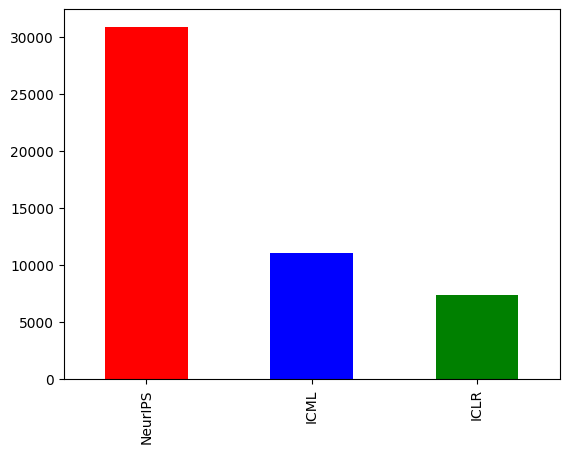

In [94]:
# bar graph of papers per conference with different colors

df['Conference'].value_counts().plot(kind='bar',color=['red','blue','green'])


In [95]:
# year of publication
df['Year'].value_counts()

2020    12017
2019    10596
2018     7560
2017     4085
2021     3836
2016     1956
2015     1321
2014     1288
2012     1103
2013     1094
2011      880
2010      859
2009      787
2008      736
2007      633
2006      566
Name: Year, dtype: int64

<AxesSubplot: >

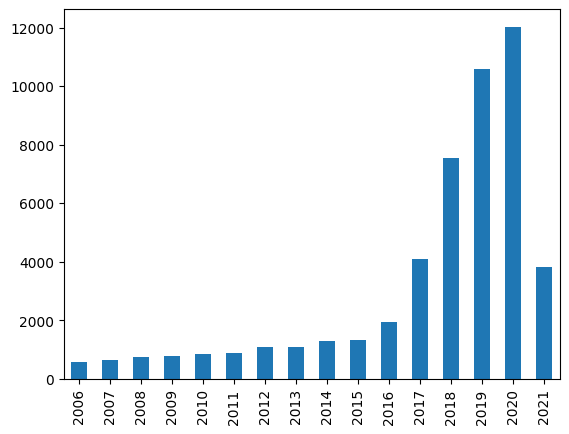

In [96]:
# bar graph of papers per year 
# sort from oldest to newest
df['Year'].value_counts().sort_index().plot(kind='bar')


In [97]:
df['Affiliation'].unique().shape

(5329,)

In [98]:
# top ten most common affiliations
df['Affiliation'].value_counts().head(10)

Stanford University           1284
Google                        1192
DeepMind                      1191
Carnegie Mellon University    1132
UC Berkeley                   1064
MIT                           1003
Microsoft Research             732
Google Brain                   703
None                           689
Princeton University           566
Name: Affiliation, dtype: int64

<AxesSubplot: ylabel='Affiliation'>

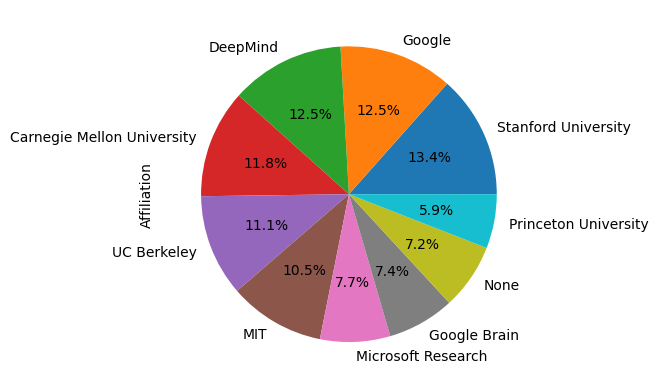

In [99]:
# pie chart of top ten affiliations with labelled percentages
df['Affiliation'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

In [100]:
# find all none affiliations
df[df['Affiliation'] == 'None']

,Conference,Year,Title,Author,Affiliation
11,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,David DeCaprio,None
12,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,Stacey Luoma,None
33,NeurIPS,2006,Training Conditional Random Fields for Maximum...,Serafim Batzoglou,None
40,NeurIPS,2006,implicit Online Learning with Kernels,Terry Caelli,None
54,NeurIPS,2006,Efficient Methods for Privacy Preserving Class...,Moshe Butman,None
...,...,...,...,...,...
24992,ICLR,2019,Bayesian Policy Optimization for Model Uncerta...,Siddhartha Srinivasa,None
25000,ICLR,2019,Accumulation Bit-Width Scaling For Ultra-Low P...,Ankur Agrawal,None
25022,ICML,2019,Training Neural Networks with Local Error Signals,Lars Hiller Eidnes,None
45290,NeurIPS,2020,Ridge Rider: Finding Diverse Solutions by Foll...,Alistair Letcher,None


In [101]:

# concatenate all title into one string
# sample only 5000 titles from the dataset
text_data = ' '.join(df['Title'].sample(5000))


In [102]:
# export string to text file
with open('text_data.txt', 'w',encoding='utf-8') as f:
    f.write(text_data)



In [115]:
import requests
import json



In [210]:
# do above for 10 papers

citation_graph = {}

from tqdm import tqdm,trange

citation_graph_df=pd.DataFrame(columns=['paperId','Cited Paper Ids'])

for i in trange(15):
    
    try:
        req2=requests.get("http://api.semanticscholar.org/graph/v1/paper/search?query="+df['Title'][i])
        dic=json.loads(req2.content.decode('utf-8'))
       

        cited_paper=[]
    
        id=dic['data'][0]['paperId']
        
        search_by_id="https://api.semanticscholar.org/graph/v1/paper/"+id+"?fields=title,citations.authors,authors"
        req3=requests.get(search_by_id)
        dic2=json.loads(req3.content.decode('utf-8'))

        for citation in dic2['citations']:
            cited_paper.append(citation['paperId'])
        citation_graph_df.loc[i]=[id,cited_paper]
        citation_graph[id]=cited_paper
        print(dic2['title'])
        print("Fetched paper ",df['Author'][i])
        print("Original Paper ",dic2['authors'])
        print()
    except:
        print("Error")



  7%|▋         | 1/15 [00:02<00:36,  2.63s/it]

Error


 13%|█▎        | 2/15 [00:03<00:24,  1.88s/it]

Error


 20%|██        | 3/15 [00:05<00:20,  1.69s/it]

Error


 27%|██▋       | 4/15 [00:08<00:22,  2.06s/it]

Multitask Feature Learning as Multiobjective Optimization: A New Genetic Programming Approach to Image Classification.
Fetched paper  Andreas Argyriou
Original Paper  [{'authorId': '151479922', 'name': 'Ying Bi'}, {'authorId': '144395433', 'name': 'Bing Xue'}, {'authorId': '145269712', 'name': 'Mengjie Zhang'}]



 33%|███▎      | 5/15 [00:10<00:22,  2.24s/it]

Multitask Feature Learning as Multiobjective Optimization: A New Genetic Programming Approach to Image Classification.
Fetched paper  Theos Evgeniou
Original Paper  [{'authorId': '151479922', 'name': 'Ying Bi'}, {'authorId': '144395433', 'name': 'Bing Xue'}, {'authorId': '145269712', 'name': 'Mengjie Zhang'}]



 40%|████      | 6/15 [00:13<00:22,  2.46s/it]

Multitask Feature Learning as Multiobjective Optimization: A New Genetic Programming Approach to Image Classification.
Fetched paper  Massimiliano Pontil
Original Paper  [{'authorId': '151479922', 'name': 'Ying Bi'}, {'authorId': '144395433', 'name': 'Bing Xue'}, {'authorId': '145269712', 'name': 'Mengjie Zhang'}]



 47%|████▋     | 7/15 [00:14<00:15,  1.94s/it]

Error


 53%|█████▎    | 8/15 [00:16<00:13,  1.96s/it]

Context Effects in Category Learning: An Investigation of Four Probabilistic Models
Fetched paper  Mike Mozer
Original Paper  [{'authorId': '144473519', 'name': 'M. Mozer'}, {'authorId': '2111329197', 'name': 'Michael Jones'}, {'authorId': '1932413', 'name': 'Michael Shettel'}]



 60%|██████    | 9/15 [00:18<00:11,  1.95s/it]

Context Effects in Category Learning: An Investigation of Four Probabilistic Models
Fetched paper  Michael Jones
Original Paper  [{'authorId': '144473519', 'name': 'M. Mozer'}, {'authorId': '2111329197', 'name': 'Michael Jones'}, {'authorId': '1932413', 'name': 'Michael Shettel'}]



 67%|██████▋   | 10/15 [00:20<00:10,  2.11s/it]

Context Effects in Category Learning: An Investigation of Four Probabilistic Models
Fetched paper  Michael Shettel
Original Paper  [{'authorId': '144473519', 'name': 'M. Mozer'}, {'authorId': '2111329197', 'name': 'Michael Jones'}, {'authorId': '1932413', 'name': 'Michael Shettel'}]



 73%|███████▎  | 11/15 [00:23<00:09,  2.33s/it]

Comparative Gene Prediction using Conditional Random Fields
Fetched paper  Jade P Vinson
Original Paper  [{'authorId': '47549003', 'name': 'J. Vinson'}, {'authorId': '1973239', 'name': 'D. DeCaprio'}, {'authorId': '49848589', 'name': 'Matthew D. Pearson'}, {'authorId': '143728844', 'name': 'Stacey Luoma'}, {'authorId': '3192833', 'name': 'J. Galagan'}]



 80%|████████  | 12/15 [00:26<00:07,  2.50s/it]

Comparative Gene Prediction using Conditional Random Fields
Fetched paper  David DeCaprio
Original Paper  [{'authorId': '47549003', 'name': 'J. Vinson'}, {'authorId': '1973239', 'name': 'D. DeCaprio'}, {'authorId': '49848589', 'name': 'Matthew D. Pearson'}, {'authorId': '143728844', 'name': 'Stacey Luoma'}, {'authorId': '3192833', 'name': 'J. Galagan'}]



 87%|████████▋ | 13/15 [00:29<00:05,  2.54s/it]

Comparative Gene Prediction using Conditional Random Fields
Fetched paper  Stacey Luoma
Original Paper  [{'authorId': '47549003', 'name': 'J. Vinson'}, {'authorId': '1973239', 'name': 'D. DeCaprio'}, {'authorId': '49848589', 'name': 'Matthew D. Pearson'}, {'authorId': '143728844', 'name': 'Stacey Luoma'}, {'authorId': '3192833', 'name': 'J. Galagan'}]



 93%|█████████▎| 14/15 [00:33<00:03,  3.01s/it]

Comparative Gene Prediction using Conditional Random Fields
Fetched paper  James Galagan
Original Paper  [{'authorId': '47549003', 'name': 'J. Vinson'}, {'authorId': '1973239', 'name': 'D. DeCaprio'}, {'authorId': '49848589', 'name': 'Matthew D. Pearson'}, {'authorId': '143728844', 'name': 'Stacey Luoma'}, {'authorId': '3192833', 'name': 'J. Galagan'}]



100%|██████████| 15/15 [00:36<00:00,  2.42s/it]

Causal inference in sensorimotor integration
Fetched paper  Konrad P Kording
Original Paper  [{'authorId': '3282030', 'name': 'Konrad Paul Kording'}, {'authorId': '1763295', 'name': 'J. Tenenbaum'}]



In [205]:
citation_graph.keys()

dict_keys(['1cac3ee85e52cb0afde71f66472e35a315a4a112', '7227f224679969446d5363c7dbfd61bcdd4b338f'])

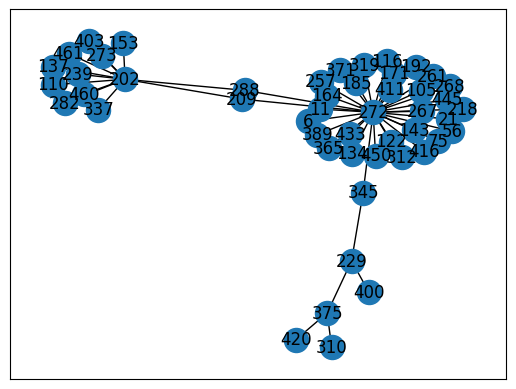

4


In [223]:
# First networkx library is imported
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt



# from gfg
class GraphVisualization:

	def __init__(self):
		
		
		self.visual = []
	
	def addEdge(self, a, b):
		temp = [a, b]
		self.visual.append(temp)
		
	
	def visualize(self):
		G = nx.Graph()
		G.add_edges_from(self.visual)
		nx.draw_networkx(G)
		plt.show()

# Driver code
G = GraphVisualization()

#hash long id to short id

def hash_id(id):
	sum_of_chars=0
	for char in id:
		sum_of_chars+=ord(char)
	return sum_of_chars%500
	

st=set()


for paper in citation_graph.keys():
    st.add(hash_id(paper))
    for cited_paper in citation_graph[paper]:
        
        G.addEdge(hash_id(cited_paper),hash_id(paper))
        j=j+1
    i=i+1
G.visualize()

print(len(st))

